In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_theme(style = "whitegrid")

# NOAA NCEI US East Coast Data Preparation

The hourly time series for data from various locations in the East Coast (CT, MA, ME, NH, NJ, NY, RI, VT) were collected from the NOAA [website](https://www.ncei.noaa.gov/cdo-web/datatools/findstation). The time series contain the hourly mean temperature, 10th percentile and 90th percentile  temperatures, and the mean air pressure.

In [8]:
raw_ts = pd.read_csv("temps_hourly_east_coast_US.csv", header = 0, parse_dates = True)
print(raw_ts.shape)

(82853, 9)


In [9]:
raw_ts["DATEMD"] = raw_ts["DATE"].str.split("T").str.get(0)
raw_ts["TIME"] = raw_ts["DATE"].str.split("T").str.get(1)
raw_ts["MONTH"] = raw_ts["DATEMD"].str.split("-").str.get(0)
raw_ts["DAY"] = raw_ts["DATEMD"].str.split("-").str.get(1)

raw_ts.head()

,STATION,LATITUDE,LONGITUDE,ELEVATION,DATE,HLY-PRES-NORMAL,HLY-TEMP-10PCTL,HLY-TEMP-90PCTL,HLY-TEMP-NORMAL,DATEMD,TIME,MONTH,DAY
0,USW00014742,44.4683,-73.1499,100.6,01-01T01:00:00,1.0,1.9,37.0,21.9,01-01,01:00:00,01,01
1,USW00014742,44.4683,-73.1499,100.6,01-01T02:00:00,1.0,1.9,37.0,21.6,01-01,02:00:00,01,01
2,USW00014742,44.4683,-73.1499,100.6,01-01T03:00:00,1.0,1.9,37.0,21.3,01-01,03:00:00,01,01
3,USW00014742,44.4683,-73.1499,100.6,01-01T04:00:00,1.0,1.0,37.0,20.9,01-01,04:00:00,01,01
4,USW00014742,44.4683,-73.1499,100.6,01-01T05:00:00,1.0,1.9,36.0,20.7,01-01,05:00:00,01,01


In [13]:
jan_ts = raw_ts[raw_ts["MONTH"] == "01"]
noon_ts = raw_ts[raw_ts["TIME"] == "12:00:00"]
print(noon_ts.shape)
jan_ts.shape

(3650, 13)


(7017, 13)

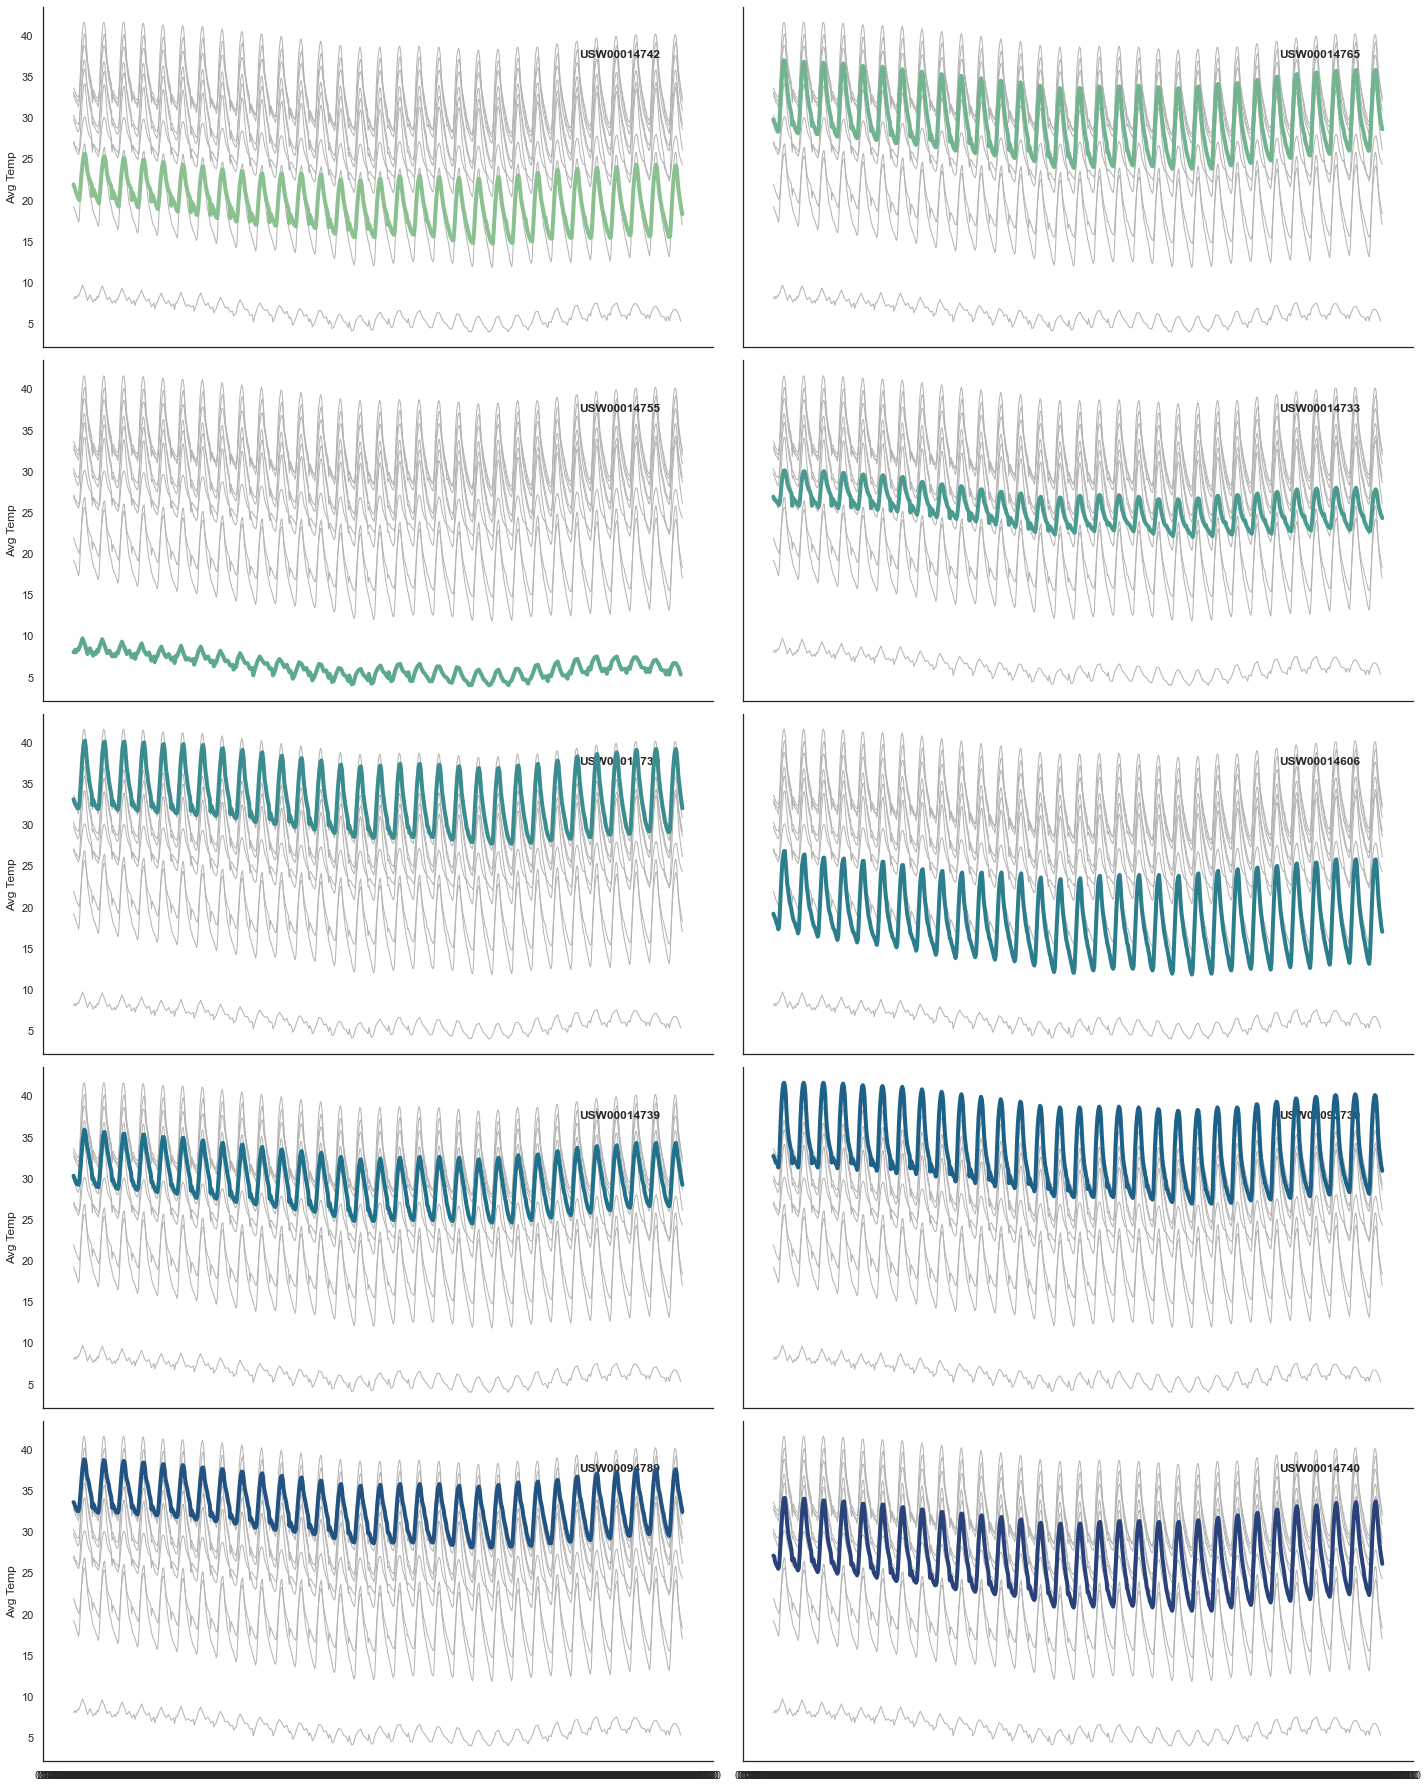

In [22]:
sns.set_theme(style="white", palette=None)
# Plot each year's time series in its own facet
g = sns.relplot(
    data=jan_ts,
    x="DATE", y="HLY-TEMP-NORMAL", col="STATION", hue="STATION",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=2, height=5, aspect=2, legend=False,
)

# Iterate over each subplot to customize further
for STATION, ax in g.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(.8, .85, STATION, transform=ax.transAxes, fontweight="bold")

    # Plot every year's time series in the background
    sns.lineplot(
        data=jan_ts, x="DATE", y="HLY-TEMP-NORMAL", units="STATION",
        estimator=None, color=".7", linewidth=1, ax=ax,
    )

# Reduce the frequency of the x axis ticks
ax.set_xticks(ax.get_xticks()[::2])

# Tweak the supporting aspects of the plot
g.set_titles("")
g.set_axis_labels("", "Avg Temp")
g.tight_layout()
plt.show()

Mount Washington = 00014755
Atlantic City International Airport = 00093790
JFK International Airport = 00094789
Buffalo Niagara International = 00014733
Boston Logan International Airport = 00014739
RI TF Green International Airport = 00014765
Burlington International Airport = 00014742
Hartford Bradley International Airport = 00014740
Bangor International Airport = 00014606
Philadelphia International Airport = 00013739

In [23]:
jan_ts["STATION"].unique()

array(['USW00014742', 'USW00014765', 'USW00014755', 'USW00014733',
       'USW00013739', 'USW00014606', 'USW00014739', 'USW00093730',
       'USW00094789', 'USW00014740'], dtype=object)

In [35]:
station_ids = {"USW00014755": "Mount Washington",
"USW00093730": "Atlantic City International Airport",
"USW00094789": "JFK International Airport",
"USW00014733": "Buffalo Niagara International Airport",
"USW00014739": "Boston Logan International Airport",
"USW00014765": "RI TF Green International Airport",
"USW00014742": "Burlington International Airport",
"USW00014740": "Hartford Bradley International Airport",
"USW00014606": "Bangor International Airport",
"USW00013739": "Philadelphia International Airport"}

noon_ts["STATION_LOC"] = noon_ts["STATION"].replace(station_ids)

noon_ts["STATION_LOC"].unique()

C:\Users\stocb\AppData\Local\Temp\ipykernel_25884\1694388213.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noon_ts["STATION_LOC"] = noon_ts["STATION"].replace(station_ids)


array(['Burlington International Airport',
       'RI TF Green International Airport', 'Mount Washington',
       'Buffalo Niagara International Airport',
       'Philadelphia International Airport',
       'Bangor International Airport',
       'Boston Logan International Airport',
       'Atlantic City International Airport', 'JFK International Airport',
       'Hartford Bradley International Airport'], dtype=object)

AttributeError: 'FacetGrid' object has no attribute 'set_xtickslabels'

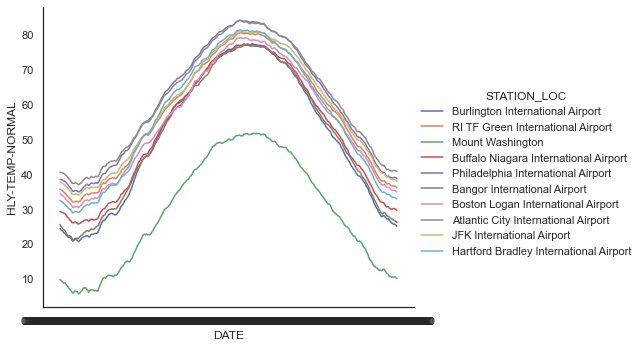

In [36]:
g = sns.relplot(data = noon_ts,
           x = "DATE", y = "HLY-TEMP-NORMAL",
           hue = "STATION_LOC", kind = "line", height = 5, aspect = 1.25)

g.set_xtickslabels(g.get_xticklabels(), rotation = 45)

In [38]:
fig = g.fig
fig.savefig("noon_avg_temps_2021.png")

In [39]:
raw_ts["STATION_LOC"] = raw_ts["STATION"].replace(station_ids)

ct_ts = raw_ts[raw_ts["STATION_LOC"] == "Hartford Bradley International Airport"]
ma_ts = raw_ts[raw_ts["STATION_LOC"] == "Boston Logan International Airport"]
me_ts = raw_ts[raw_ts["STATION_LOC"] == "Bangor International Airport"]
nh_ts = raw_ts[raw_ts["STATION_LOC"] == "Mount Washington"]
nj_ts = raw_ts[raw_ts["STATION_LOC"] == "Atlantic City International Airport"]
ny_ts1 = raw_ts[raw_ts["STATION_LOC"] == "JFK International Airport"]
ny_ts2 = raw_ts[raw_ts["STATION_LOC"] == "Buffalo Niagara International Airport"]
pa_ts = raw_ts[raw_ts["STATION_LOC"] == "Philadelphia International Airport"]
ri_ts = raw_ts[raw_ts["STATION_LOC"] == "RI TF Green International Airport"]
vt_ts = raw_ts[raw_ts["STATION_LOC"] == "Burlington International Airport"]

In [55]:
ctma_ts = pd.merge(ct_ts.loc[:,["DATE", "TIME", "MONTH", "DAY", "HLY-TEMP-NORMAL", "HLY-TEMP-10PCTL", "HLY-TEMP-90PCTL"]],
                   ma_ts.loc[:,["DATE", "TIME", "MONTH", "DAY", "HLY-TEMP-NORMAL", "HLY-TEMP-10PCTL", "HLY-TEMP-90PCTL"]],
                   on = ["DATE", "TIME", "MONTH", "DAY"],
         suffixes = ["_ct", "_ma"], 
         how = "outer")
print(ctma_ts.shape)

menh_ts = pd.merge(me_ts.loc[:,["DATE", "TIME", "MONTH", "DAY", "HLY-TEMP-NORMAL", "HLY-TEMP-10PCTL", "HLY-TEMP-90PCTL"]],
                   nh_ts.loc[:,["DATE", "TIME", "MONTH", "DAY", "HLY-TEMP-NORMAL", "HLY-TEMP-10PCTL", "HLY-TEMP-90PCTL"]],
                   on = ["DATE", "TIME", "MONTH", "DAY"],
         suffixes = ["_me", "_nh"], 
         how = "outer")

njny1_ts = pd.merge(nj_ts.loc[:,["DATE", "TIME", "MONTH", "DAY", "HLY-TEMP-NORMAL", "HLY-TEMP-10PCTL", "HLY-TEMP-90PCTL"]],
                   ny_ts1.loc[:,["DATE", "TIME", "MONTH", "DAY", "HLY-TEMP-NORMAL", "HLY-TEMP-10PCTL", "HLY-TEMP-90PCTL"]],
                   on = ["DATE", "TIME", "MONTH", "DAY"],
         suffixes = ["_nj", "_ny1"], 
         how = "outer")

pany2_ts = pd.merge(pa_ts.loc[:,["DATE", "TIME", "MONTH", "DAY", "HLY-TEMP-NORMAL", "HLY-TEMP-10PCTL", "HLY-TEMP-90PCTL"]],
                   ny_ts2.loc[:,["DATE", "TIME", "MONTH", "DAY", "HLY-TEMP-NORMAL", "HLY-TEMP-10PCTL", "HLY-TEMP-90PCTL"]],
                   on = ["DATE", "TIME", "MONTH", "DAY"],
         suffixes = ["_pa", "_ny2"], 
         how = "outer")

rivt_ts = pd.merge(ri_ts.loc[:,["DATE", "TIME", "MONTH", "DAY", "HLY-TEMP-NORMAL", "HLY-TEMP-10PCTL", "HLY-TEMP-90PCTL"]],
                   vt_ts.loc[:,["DATE", "TIME", "MONTH", "DAY", "HLY-TEMP-NORMAL", "HLY-TEMP-10PCTL", "HLY-TEMP-90PCTL"]],
                   on = ["DATE", "TIME", "MONTH", "DAY"],
         suffixes = ["_ri", "_vt"], 
         how = "outer")

ctmamenh_ts = pd.merge(ctma_ts, menh_ts, on = ["DATE", "TIME", "MONTH", "DAY"], how = "outer")
njnynypa_ts = pd.merge(njny1_ts, pany2_ts, on = ["DATE", "TIME", "MONTH", "DAY"], how = "outer")
njnynyparivt_ts = pd.merge(njnynypa_ts, rivt_ts, on = ["DATE", "TIME", "MONTH", "DAY"], how = "outer")
full_ts = pd.merge(njnynyparivt_ts, ctmamenh_ts, on = ["DATE", "TIME", "MONTH", "DAY"], how = "outer")
full_ts.head()

(8759, 10)


,DATE,TIME,MONTH,DAY,HLY-TEMP-NORMAL_nj,HLY-TEMP-10PCTL_nj,HLY-TEMP-90PCTL_nj,HLY-TEMP-NORMAL_ny1,HLY-TEMP-10PCTL_ny1,HLY-TEMP-90PCTL_ny1,...,HLY-TEMP-90PCTL_ct,HLY-TEMP-NORMAL_ma,HLY-TEMP-10PCTL_ma,HLY-TEMP-90PCTL_ma,HLY-TEMP-NORMAL_me,HLY-TEMP-10PCTL_me,HLY-TEMP-90PCTL_me,HLY-TEMP-NORMAL_nh,HLY-TEMP-10PCTL_nh,HLY-TEMP-90PCTL_nh
0,01-01T01:00:00,01:00:00,01,01,32.7,18.0,48.0,33.6,21.0,45.0,...,39.0,30.3,16.0,42.1,19.2,1.9,34.0,8.0,-13.0,25.0
1,01-01T02:00:00,02:00:00,01,01,32.5,18.0,48.9,33.4,21.0,45.0,...,39.0,30.0,16.0,42.1,18.9,0.0,34.0,NaN,NaN,NaN
2,01-01T03:00:00,03:00:00,01,01,32.2,17.1,48.9,33.1,19.9,45.0,...,39.9,29.8,15.1,42.1,18.7,0.0,34.0,8.3,-11.2,25.2
3,01-01T04:00:00,04:00:00,01,01,31.9,16.0,48.9,32.8,19.9,45.0,...,39.9,29.5,15.1,42.1,18.4,0.0,34.0,8.0,-11.0,24.8
4,01-01T05:00:00,05:00:00,01,01,31.8,17.1,48.9,32.7,19.9,44.1,...,39.9,29.3,15.1,42.1,18.0,-0.4,35.1,NaN,NaN,NaN


In [56]:
full_ts.shape

(8759, 34)

In [63]:
full_ts.to_csv("temps_hourly_east_coast_US_horizontal.csv", index = False)

In [3]:
1.0 / (1 + np.exp(2.0))

0.11920292202211755